In [1]:
from scipy.special import roots_legendre
import numpy as np
import matplotlib.pyplot as plt

In [65]:
def approx_error_gauss(x, m, k):
    t, w = roots_legendre(m)
    w /= 2
    t += 1
    t /= 2
    t[0] = 0
    def f(t, x):
        return (x - 1)/(1 + t * (x - 1))
    g = 2 ** k * np.sum([wj * f(tj, np.power(x, 1 / 2 ** k)) for wj, tj in zip(w, t)], axis=0)
    return np.abs(g - np.log(x))

def approx_error_pade(x, k):
    def f(x):
        return (x - 1) * (x + 5) / (2 * (1 + 2 * x))
    return np.abs(2 ** k * f(np.power(x, 1 / 2 ** k)) - np.log(x))

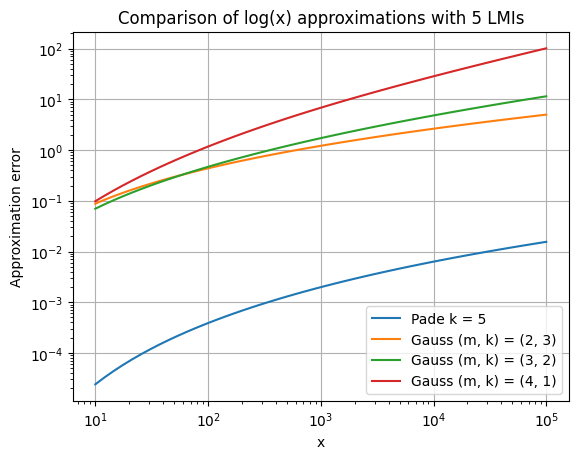

In [ ]:
x = np.logspace(1, 5)
plt.plot(x, approx_error_pade(x, 5), label='Pade k = 5')
plt.plot(x, approx_error_gauss(x, 2, 3), label='Gauss (m, k) = (2, 3)')
plt.plot(x, approx_error_gauss(x, 3, 2), label='Gauss (m, k) = (3, 2)')
plt.plot(x, approx_error_gauss(x, 4, 1), label='Gauss (m, k) = (4, 1)')
plt.title('Comparison of log(x) approximations with 5 LMIs')
plt.xlabel('x')
plt.ylabel('Approximation error')
plt.loglog()
plt.grid()
plt.legend()
plt.savefig('logx_approx_5_LMI',bbox_inches='tight')
plt.show()

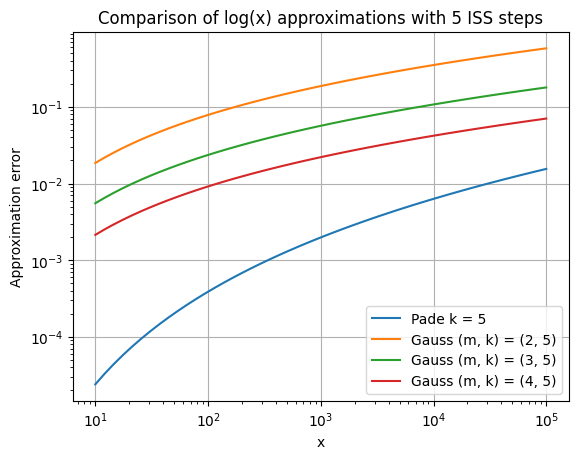

In [73]:
x = np.logspace(1, 5)
plt.plot(x, approx_error_pade(x, 5), label='Pade k = 5')
plt.plot(x, approx_error_gauss(x, 2, 5), label='Gauss (m, k) = (2, 5)')
plt.plot(x, approx_error_gauss(x, 3, 5), label='Gauss (m, k) = (3, 5)')
plt.plot(x, approx_error_gauss(x, 4, 5), label='Gauss (m, k) = (4, 5)')
plt.title('Comparison of log(x) approximations with 5 ISS steps')
plt.xlabel('x')
plt.ylabel('Approximation error')
plt.loglog()
plt.grid()
plt.legend()
plt.savefig('logx_approx_5_ISS',bbox_inches='tight')
plt.show()